# Part One : No Features Scaling

# Goals
- Measure students' performance based on their hours studied, previous scores, participation in extracurricular activities, sleep hours, and the number of sample question papers practiced.

In [1]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

# Problem Statement

We aim to provide insights into the relationship between the predictor variables and the performance index. We will  use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

### Variables:
    - Hours Studied: The total number of hours spent studying by each student.
    - Previous Scores: The scores obtained by students in previous tests.
    - Sleep Hours: The average number of hours of sleep the student had per day.
    - Sample Question Papers Practiced: The number of sample question papers the student practiced.
### Target Variable:
    - Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The training data is from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).

In [2]:
# Read the CSV file
f = pd.read_csv('data/train_multi.csv')

In [3]:
# Describe the columns
print(f.columns)
# Check for null values
f.isnull().sum()

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
# Check for duplicated values
f.duplicated().sum()

0

In [5]:
# Separate the independent variables (features)
X_train = np.array(f[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
# Separate the dependent variable (target)
y_train = np.array(f['Performance Index'])

In [6]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (156, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (156,), y Type:<class 'numpy.ndarray'>)


#  Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$
$$\tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b   $$ 
$$\tag{2}$$
where $\cdot$ is a vector `dot product`


In [7]:
def predict(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p 

# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is: 
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$
$$\tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b   $$
$$\tag{4}$$

In [8]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for multiple linear regression
    
    Args:
        x (ndarray (m,n)) : features
        y (ndarray (m,)) : targets
        w (ndarray (n,)) : model parameters( weights )
        b (scalar)       : model parameter( bias )
        
    returns : 
        cost (float ) : the cost for the current model
    """
    m = X.shape[0]
    j_wb = 0
    for i in range(m):
        j_wb += ((np.dot(w,X[i])+b) - y[i])**2
    j_wb/=2*m
    return j_wb

# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$
$$\tag{5} $$
where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} 
\end{align}
$$
$$\tag{6} $$
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$
$$\tag{7} $$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


## Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [9]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for multiple linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): the gradient of the cost according to w.
      dj_db (scalar):       the gradient of the cost according to b.
    """
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        error = (np.dot(w,X[i]) + b) - y[i] 
        for j in range(n):
            dj_dw[j] += np.clip(error * X[i][j], -1e10, 1e10)

        dj_db += np.clip(error, -1e10, 1e10)
    dj_dw /=m
    dj_db /=m
    return dj_dw,dj_db

##  Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [10]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters gradient steps with learning rate alpha
    
    Args:
        X (ndarray (m,n))   : features
        y (ndarray (m,))    : targets
        w_in (ndarray (n,)) : initial model parameters  
        b_in (scalar)       : initial model parameter
        alpha (float)       : Learning rate ( between 0 and 1 )
        num_iters (int)     : number of iterations to run gradient descent
        cost_function       : function to call to produce cost
        gradient_function   : function to call to produce gradient
      
    Returns:
        w (ndarray (n,))   : Updated values of parameters 
        b (scalar)         : Updated value of parameter 
        history (List)     : History of cost values
      """
    
    # An array to store cost J and w's at each iteration 
    m,n = X.shape
    cost_history = []
    w_history =np.zeros((num_iters,n))
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters) :
        dj_w, dj_b = gradient_function(X, y, w, b)
        
        # update the parameters
        w = w - alpha*dj_w
        b = b - alpha*dj_b
    
        # Save the cost and the new values of the parameters
        if(i<100000):
            cost_history.append(cost_function(X, y, w, b))
            w_history[i] = np.array(w)
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}")
    return w, b, cost_history, w_history
        

In [11]:
# initialize parameters
initial_w = np.array([ 2.68, 0.94, -0.25, 0.03])
initial_b =-21.68
# some gradient descent settings
iterations = 10000
alpha = 3.0e-4
# run gradient descent 
w_final, b_final, cost_hist, w_history = gradient_descent(X_train, y_train, initial_w, initial_b,
                                               alpha, iterations, compute_cost, compute_gradient, )
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

Iteration    0: Cost     3.90
Iteration 1000: Cost     3.87
Iteration 2000: Cost     3.84
Iteration 3000: Cost     3.81
Iteration 4000: Cost     3.78
Iteration 5000: Cost     3.75
Iteration 6000: Cost     3.72
Iteration 7000: Cost     3.69
Iteration 8000: Cost     3.66
Iteration 9000: Cost     3.64
b,w found by gradient descent: -22.61,[ 2.7   0.94 -0.19  0.04] 


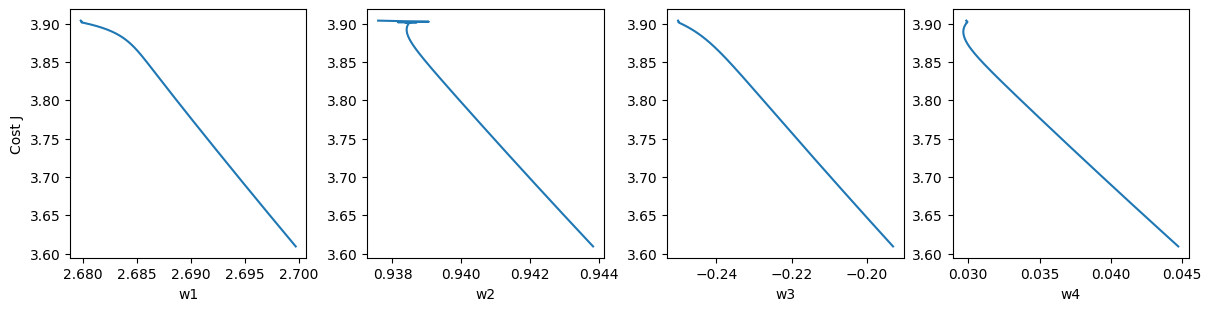

In [12]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), constrained_layout=True)
for i in range(len(ax)):
    ax[i].plot(w_history[:,i],cost_hist)
    ax[i].set_xlabel(f'w{i+1}')
ax[0].set_ylabel("Cost J")
plt.show()

# Model Evaluation

In [13]:
y_hat = np.zeros((m,))
for i in range(0,m):
    y_hat[i] = np.dot(X_train[i],w_final) + b_final
    if(i%20==0):
        print(f"actual value = {y_train[i]}     - predicted value = {y_hat[i]}")


actual value = 91.0     - predicted value = 88.0314896695131
actual value = 71.0     - predicted value = 72.88763281735879
actual value = 45.0     - predicted value = 48.23039329573966
actual value = 70.0     - predicted value = 72.31350999736405
actual value = 45.0     - predicted value = 50.15098196019923
actual value = 27.0     - predicted value = 31.890931048589987
actual value = 30.0     - predicted value = 29.4973546935344
actual value = 58.0     - predicted value = 60.87917895405717


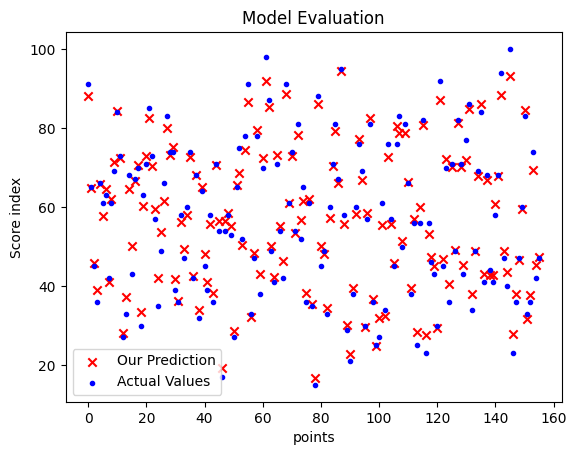

In [14]:
pts = np.arange(len(y_train))
# Plot our model prediction
plt.scatter(pts, y_hat, marker='x', c='r',label='Our Prediction')
# Plot the data points
plt.scatter(pts, y_train, marker='.', c='b',label='Actual Values')
# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Score index')
# Set the x-axis label
plt.xlabel('points')
plt.legend()
plt.show()

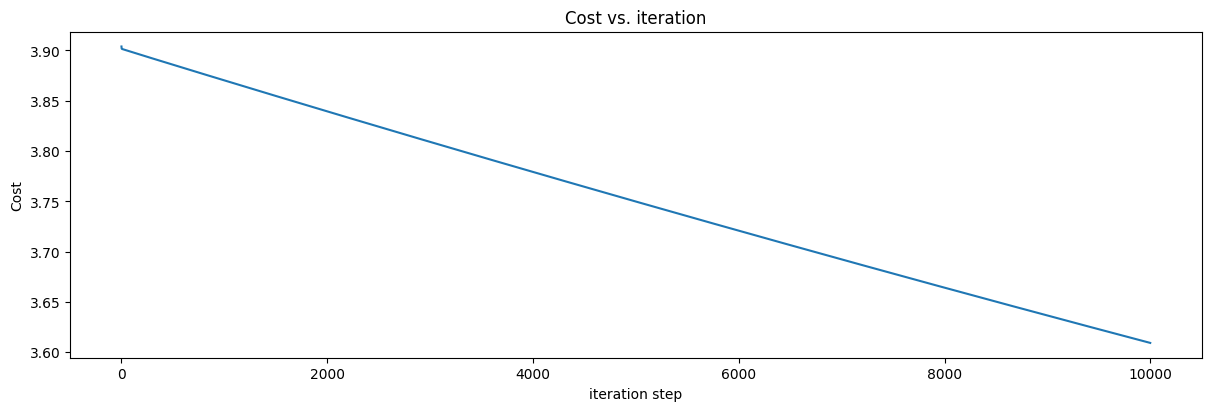

In [15]:
# plot cost versus iteration  
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(np.arange(len(cost_hist)),cost_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')  
plt.show()

# Part Two : With Features Scaling

# Goals
- improve performance of gradient descent by *feature scaling* using z-score normalization

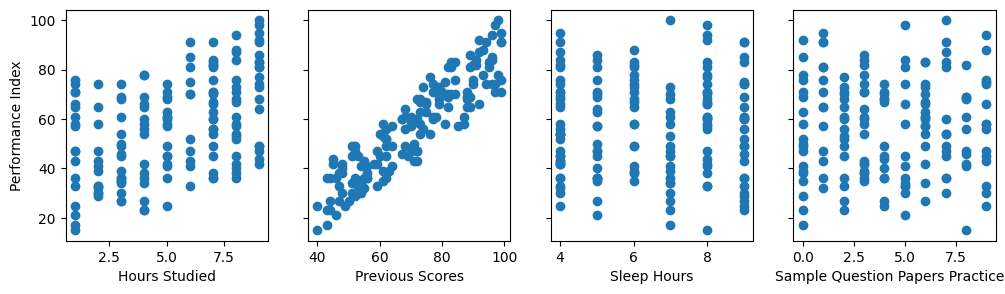

In [16]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(f.columns[i])
ax[0].set_ylabel(f.columns[4])
plt.show()

# Feature Scaling 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} $$ 
$$\tag{8}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j
\end{align}
$$
$$\tag{9}$$
$$
\begin{align}
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$
$$\tag{10}$$

In [17]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
    X (ndarray (m,n))     : input data, m examples, n features
    
    Returns:
    X_norm (ndarray (m,n)): input normalized by column
    mu (ndarray (n,))     : mean of each feature
    sigma (ndarray (n,))  : standard deviation of each feature
    """
    mu = np.mean(X, axis =0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu ) / sigma
    return X_norm, mu, sigma

In [18]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [ 5.22 70.71  6.45  4.25], 
X_sigma = [ 2.64 16.89  1.82  2.85]
Peak to Peak range by column in Raw        X:[ 8 59  5  9]
Peak to Peak range by column in Normalized X:[3.03 3.49 2.75 3.15]


In [19]:
# initialize parameters
initial_w_norm = np.array([ 2.68, 0.94, -0.25, 0.03])
initial_b_norm =-21.68
# some gradient descent settings
iterations_norm = 10000
alpha_norm = 3.0e-3
# run gradient descent 
w_norm, b_norm, cost_hist_norm, w_history_norm = gradient_descent(X_norm, y_train, initial_w_norm, initial_b_norm,
                                               alpha_norm, iterations_norm, compute_cost, compute_gradient, )
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

Iteration    0: Cost  3217.62
Iteration 1000: Cost     9.69
Iteration 2000: Cost     1.86
Iteration 3000: Cost     1.84
Iteration 4000: Cost     1.84
Iteration 5000: Cost     1.84
Iteration 6000: Cost     1.84
Iteration 7000: Cost     1.84
Iteration 8000: Cost     1.84
Iteration 9000: Cost     1.84
b,w found by gradient descent: -22.61,[ 2.7   0.94 -0.19  0.04] 


# Model Evaluation

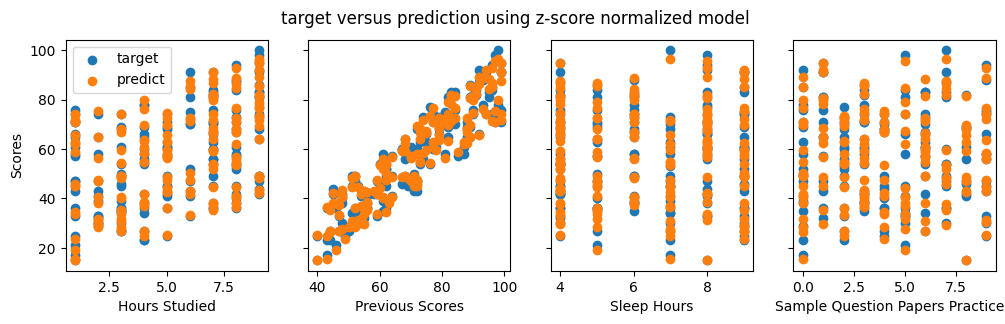

In [20]:
m = X_norm.shape[0]
y_hat_norm = np.zeros((m,))
for i in range(0,m):
    y_hat_norm[i] = np.dot(X_norm[i],w_norm) + b_norm
    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(f.columns[i])
    ax[i].scatter(X_train[:,i],y_hat_norm, label = 'predict')
ax[0].set_ylabel("Scores"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

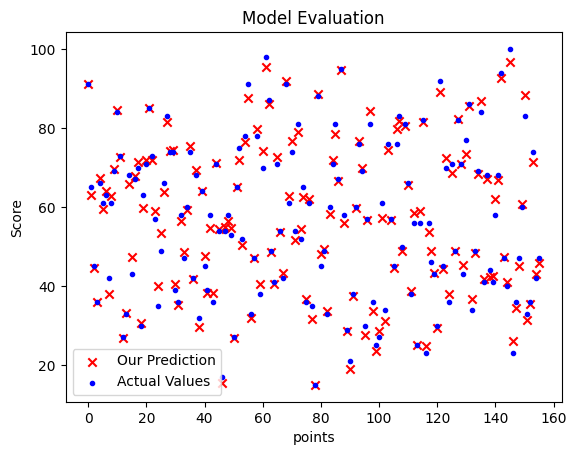

In [21]:
pts_norm = np.arange(len(y_train))
# Plot our model prediction
plt.scatter(pts_norm, y_hat_norm, marker='x', c='r',label='Our Prediction')
# Plot the data points
plt.scatter(pts_norm, y_train, marker='.', c='b',label='Actual Values')
# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('points')
plt.legend()
plt.show()

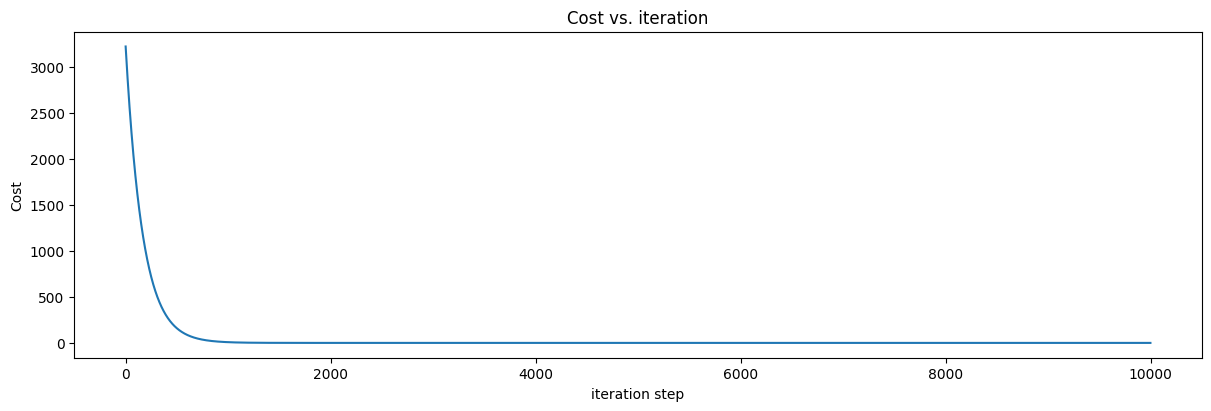

In [22]:
# plot cost versus iteration  
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(np.arange(len(cost_hist_norm)),cost_hist_norm)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')  
plt.show()

# Prediction

In [23]:
def predict_performance(student):
    student_norm = (student- X_mu)/X_sigma
    print(f"The predicted score for this student with : ")
    for i in range(4):
        print(f"\t \t {f.columns[i]} : {student[i]}")
    print(f"equals to {np.dot(student_norm,w_norm)+b_norm}")

In [24]:
predict_performance(np.array([7,74,8,1]))

The predicted score for this student with : 
	 	 Hours Studied : 7
	 	 Previous Scores : 74
	 	 Sleep Hours : 8
	 	 Sample Question Papers Practiced : 1
equals to 65.28016063475253


In [25]:
predict_performance(np.array([9,97,7,0]))

The predicted score for this student with : 
	 	 Hours Studied : 9
	 	 Previous Scores : 97
	 	 Sleep Hours : 7
	 	 Sample Question Papers Practiced : 0
equals to 93.78773490881736


In [26]:
predict_performance(np.array([1,49,4,2]))

The predicted score for this student with : 
	 	 Hours Studied : 1
	 	 Previous Scores : 49
	 	 Sleep Hours : 4
	 	 Sample Question Papers Practiced : 2
equals to 20.78603893665641


# Part Three : Regularization

## Goals
- improve performance of cost function and gradient descent by using *Regularization*

# Cost functions with regularization

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$ 
    
Including $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$  encourages gradient descent to minimize the size of the parameters. Note the parameter $b$ is not regularized. This is standard practice.

In [27]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
    m,n = X.shape
    total_cost = 0
    for i in range(m):
        total_cost += ((np.dot(w,X[i])+b) - y[i])**2
    total_cost/=2*m
    reg=0
    for i in range(n):
        reg+=(w[i])**2
    total_cost +=(lambda_/(2*m))*reg
    return total_cost
    

## Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

### Computing the Gradient with regularization
The gradient calculation for linear regression is :
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

In [28]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        f_wb = np.dot(w,X[i])+b
        error = f_wb - y[i]
        for j in range(n):
            dj_dw[j]+= (error*X[i,j])
        dj_db += error
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m
        
    for j in range(n):
        dj_dw[j]+= (lambda_/m) * w[j]
    return dj_dw,dj_db